## Workshop on Practical Data Analysis in Earth and Planetary Science. Seminar 4

every Monday at 4pm (CEST), at the Center for Planetary Habitability (PHAB), Wegener's room (1st floor, ZEB-building) and everywhere in Zoom https://uio.zoom.us/j/61896722660, Meeting ID: 618 9672 2660

In this workshop we will continue working with time series and data analysis in frequency domain. In particluar, it is useful to look at spectra and spectroscopy - inference of chemical composition based on observed energy (or frequency as $E = h\nu$) distribution of photons (electromagnetic waves). As usual useful reference material is in M. Trauth's books whicha are in dropbox https://www.dropbox.com/scl/fo/ouxmaiunaxjncmjvzjjjp/h?rlkey=mco9ra8fbygwax9oroglfesw0&dl=0. 

### Natural gamma ray spectroscopy from IODP core data 
Gamma radiation is emitted because of the spontaneous decay of radioactive elements 238-uranium (238U), 232-thorium (232Th), and 40-potassium (40K) contained in all rocks. When 238U, 232Th, and 40K radioisotopes decay, they and their daughter products emit gamma radiation at specific energy levels unique to each isotope. Natural gamma radiation (NGR) spectroscopy measures a wide energy spectrum that can be used to estimate the abundance of each isotope based on the strength of the signal at characteristic energies (Blum, 1997; Gilmore, 2008). In sedimentary rocks, Th and K are usually associated with particular clay minerals, while U is often encountered in either clay minerals or organic-rich material. Since minor changes in the abundance of clay minerals produce a relatively large variation in gamma radiation, the NGR data are useful as a lithological indicator, aiding in core-to-core correlation. The NGR spectral data were processed to estimate U, Th, and K contents with depth using the method and Matlab routines by De Vleeschouwer et al. (2017) https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GC006715.

The uranium isotopes U-238 (99% found on Earth), U-235, and U-234 and many of the decay products mainly emit alpha radiation and only little gamma radiation, while several decay products mainly emit beta radiation. Two of the beta emitters (Pb-214 and Bi-214) are the main source of gamma radiation.

In [49]:
import IPython
import urllib.request
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/6/65/Decay_chain%284n%2B2%2C_Uranium_series%29.svg','u-series.svg')
IPython.display.IFrame('u-series.svg',width=600,height=300)

The NGRL measures this natural emission on whole-round cores using a system designed and built at the Integrated Ocean Drilling Program-US Implementing Organization (USIO) (Texas A&M University, USA). The NGRL system was installed on the renovated D/V JOIDES Resolution (JR) in 2009 and has been used on every JR expedition starting with Expedition 320. The NGRL system consists of 8 sodium iodide (NaI) detectors arranged at 20 cm intervals under the lower half of the core section.

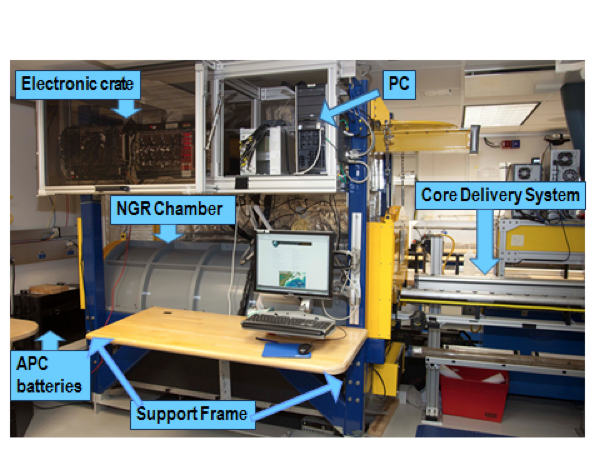

In [31]:
IPython.display.Image('https://wiki.iodp.tamu.edu/download/attachments/129204446/image2018-7-30_1-19-33.png', width = 400)

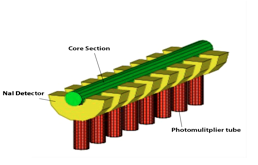

In [29]:
IPython.display.Image('https://wiki.iodp.tamu.edu/download/attachments/129204446/image2018-7-30_1-22-17.png', width = 400)

The data are collected in two measurement cycles, each of which produced NGRL measurements at 8 positions within the core section. During the first measurement cycle, the first detector was located 10 cm from the top of the core section, thus producing 8 measurements a
t positions that are odd multiples of 10 cm from the top of the core. The core was then advanced 10 cm, producing another 8 measurements at positions that are even multiples of 10 cm from the top of the core. The detector array has both passive (layers of lead) and active (plastic scintillators) shielding to reduce the background environmental and cosmic radiation. The plastic scintillators are positioned above the core section and detect incoming high-energy gamma and muon cosmic radiation that is removed from the total counted by the NaI detectors. The passive (lead) layers separate the NaI detectors, isolating the portion of the core being measured. The quality of the energy spectrum measured in a core depends on the concentration of radionuclides in the sample and on the measurement time, with longer duration measurements yielding better spectra. Measurement times are about ~10 min per core section (1,5 meter). This yields statistically significant energy spectra for most lithologies (Vasiliev et al., 2011).

Below is an example of the NGR deconvolution for K-U-Th concentrations at IODP EXP392, Site 1581 http://publications.iodp.org/proceedings/392/392title.html

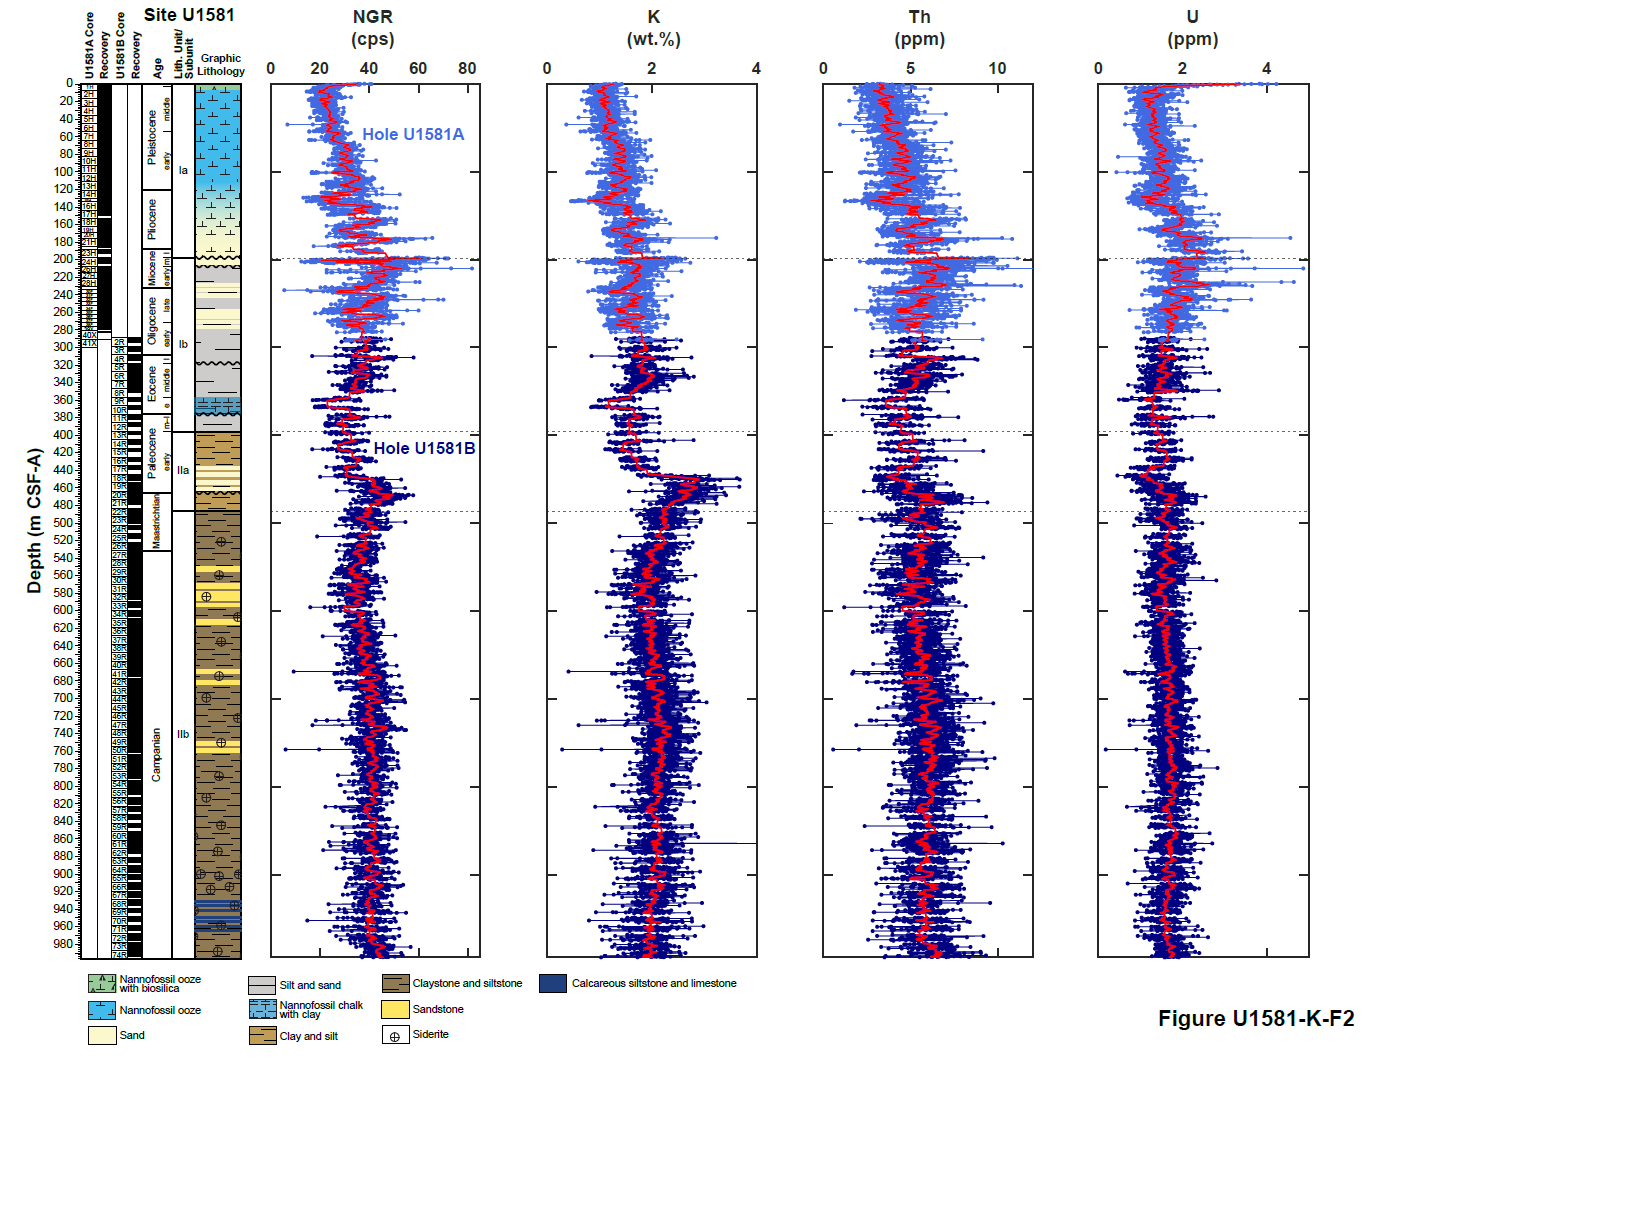

In [65]:
urllib.request.urlretrieve('https://dl.dropboxusercontent.com/s/eomiz2rbw10ilb1lut1lu/log_example.png?rlkey=dr98jju0yncwuigyppgjbtt90&dl=0','log.png')
IPython.display.Image('log.png', width = 1800)

Below are results of measurements performed with K-U-T standards with known concentrations and density (color curves) and background (empty core liner) measurements (black curves). Y-axis are total counts and X-axis is energy in keV (channel of the NaI detector). 8 curves on each plot correspond to the data from each detector.

In [61]:
IPython.display.IFrame('kut-standard.png', height = 300, width = 900)

In the example below, the observed NGR data (total counts). We can make a resonable assumption the data represent a superposition of the three spectra of most abundant radioactive elements: U, Th, and K plus background radiation:

$S_{total} = C_1 * S_K + C_2 * S_{Th} + C_3 * S_{U} + C_4 * S_{bg}$,

with the coefficients proportional to the elemental concentrations.

In [64]:
IPython.display.IFrame('ngr-data-ex.png', height = 300, width = 900)

During the workshop we will try "deconvolve" the total natural gamma radiation spectrum to obtain K-U-Th elemental concentration in a portion of the core sample. The concentration can be found by comparison of the mean area under the characteric peak in the spectra in the standard with known concentration and in core sample. The standard values of the energy range for characteristic peaks are for K-40 is 1270-1570 keV; Th-232 can be characterized by gamma emission of thalium Tl-208 at 2410 2710 keV. The content U-238 is identified by Bi-214 emission peak at 1660-1860 keV. The ratio between the area ($A$) under the curve divided by the density of the sample and the standard (corresponding to energy contained per unit mass, $J/kg$, assuming same volume of the core) provides an estimate of the elemental abundance (element $i$) in the core sample: 

$C_{smpl}^i = \frac{A_{smpl}^i}{A_{stnd}^i}\frac{\rho_{smpl}^i}{\rho_{stnd}^i} C_{stnd}^i$.

Such as to estimate the concerntration of K, the code would look like:

In [72]:
%% reading data
spe_files=dir('U1341B-16H-1-W_SHLF1110331_2009730151613/*_SHLF*.spe'); % list of spe-files in the unzipped directory

ndata = 1024;

data=zeros(ndata,length(spe_files)); % This matrix will contain all NGR spectra
%In this loop we fill in the NGR spectra in data, the information on
%the measured section in data_info, and the time of measurement.
for j=1:length(spe_files)
    fid = fopen(strcat('U1341B-16H-1-W_SHLF1110331_2009730151613/',spe_files(j).name));
    tline = fgetl(fid);
    while ~strcmp('$MEAS_TIM:',tline)
        tline = fgetl(fid);
    end
    tline = fgetl(fid);
    temp=cell2mat(textscan(tline,'%f'));
    t_data(j)=temp(1);
     
    while ~strcmp('$DATA:',tline)
        tline = fgetl(fid);
    end
    tline = fgetl(fid);
    i=0;
    while i<ndata
        i=i+1;
        tline = fgetl(fid);
        data(i,j)=cell2mat(textscan(tline,'%f')); % For the considered NGR measurement, we fill the matrix 'data(:,j)' with the NGR counts at the 1024 energy levels 
    end
    fclose(fid);
    j
end

%% 
rho_smpl = 1.300; %density of the sample
%ENER_FIT:
ENER_FIT =  [-9.8; 3.3];
Ener_smpl = ENER_FIT(2)*(0:1023) + ENER_FIT(1);


% load standard
load kut-standards

figure, plot(Ener_smpl,data(:,1)/t_data(1)), hold on,
plot(Ener(1,:), S_K(:,1)/t_stnd)
plot([1270,1270],[0 .1],'--k',[1570,1570],[0 .1],'--k','LineWidth',2)


C_K = 5*sum(data(Ener_smpl(1,:)>1270&Ener_smpl(1,:)<1570,1)/...
    t_data(1))/sum(S_K(Ener(1,:)>1270&Ener(1,:)<1570,1)/t_stnd)


SyntaxError: invalid syntax (2848236643.py, line 1)

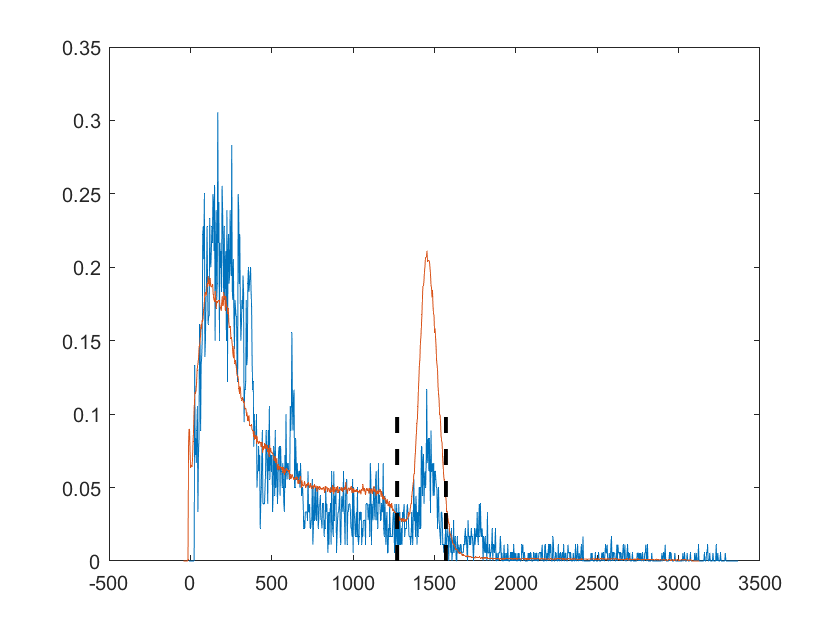

In [76]:
IPython.display.Image('workshop-sandbox/ngr/k-peak.png', height = 300, width = 900)

We can also utilize the entire spectrum and solve a linear system of equation using least squares method:
\begin{equation}
\begin{array}{lcr} 
b_1^j &=& S_K^{1j} w_K C_K  + S_U^{1j} w_U C_U + S_{Th}^{1j} w_{Th} C_{Th} + S_{bg}^{1j} w_{bg} C_{bg} \\
b_2^j &=& S_K^{2j} w_K C_K  + S_U^{2j} w_U C_U + S_{Th}^{2j} w_{Th} C_{Th} + S_{bg}^{2j} w_{bg} C_{bg} \\
b_3^j &=& S_K^{3j} w_K C_K  + S_U^{3j} w_U C_U + S_{Th}^{3j} w_{Th} C_{Th} + S_{bg}^{3j} w_{bg} C_{bg} \\
\cdots \\
b_N^j &=& S_K^{Nj} w_K C_K  + S_U^{Nj} w_U C_U + S_{Th}^{Nj} w_{Th} C_{Th} + S_{bg}^{Nj} w_{bg} C_{bg}
\end{array}
\end{equation}

where $b$ is the total counts per second measured on the core sample at detector $j$, $S$ are standard spectra in counts per second, $N$ is the number of channels (energy windows) at each detector, e.g. $N = 1024$, $w$ are normalization coefficients.


Below is a Matlab code that illustrating the least squares method to calculate the elemental abundances in the core sample from NGR measurements   

In [66]:
w = [5 100 100 1].^(-1) ./rho_stnd;% concentration weights
w = diag(w);
t_data = 300; % data measurement time (s)
t_stnd = 21600; % spectra measurement time (s)
detector = 5; % detector ID = (1:8)

for j =1:ndata % loop over data points (distance from the top of the core section)
    %make system matrix using K-U-Th standards spectra (in total counts)
    A = [S_K(:,detector) S_U(:,detector) S_Th(:,detector) S_bg(:,detector)]; 
    A = A*(w*rho_smpl); % normalize the system matrix
    A = A / t_stnd; % standard spectra in counts per second 
    b = data(:,j) / t_data; % data spectrum in counts per second  
    x = A\b ; % solving the linear system of equations
    % estimate covariance 
    H  = (A'*A)\A'; % Jacobian
    cv = H*H'*var(b); % covariance matrix
    v  = diag(cv); % variance estimate
    % calculate residuals 
    b1 = A*x; % estimated spectrum
    res = rms(b1-b);
end
        
        

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3395583012.py, line 1)

The equivalent Python code is

In [70]:
import numpy as np

# concentration weights
w = np.array([5, 100, 100, 1])
w = np.diag(1/rho_stnd/w)

t_data = 300  # data measurement time (s)
t_stnd = 21600  # spectra measurement time (s)
detector = 4  # detector ID (0:7) Python uses zero-based indexing

# Assuming S_K, S_U, S_Th, S_bg, and data are defined somewhere.
# Replace ndata with the actual number of data points.
# The following loop will iterate over each data point (distance from the top of the core section)

for j in range(ndata):
    # make system matrix using K-U-Th standards spectra (in total counts)
    A = np.column_stack((S_K[:, detector], S_U[:, detector], S_Th[:, detector], S_bg[:, detector]))
    A = A @ (w*rho_smpl[j])  # normalize the system matrix
    A = A / t_stnd  # standard spectra in counts per second
    b = data[:, j] / t_data  # data spectrum in counts per second
    
    x = np.linalg.solve(A, b)  # solving the linear system of equations
    
    # estimate covariance
    H = np.linalg.solve(A.T @ A, A.T)  # Jacobian
    cv = H @ H.T @ np.var(b)  # covariance matrix
    v = np.diag(cv)  # variance estimate
    
    # calculate residuals
    b1 = A @ x  # estimated spectrum
    res = np.sqrt(np.mean((b1 - b) ** 2))  # Root Mean Square Residual


NameError: name 'rho_stnd' is not defined